# Analysis Code of Subject 24 (Child)



In [1]:
import os
import numpy as np
import mne
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 5)

In [2]:
cd /directory_of_sub_01

/directory_of_sub_01_eeg_data


In [3]:
ls

sub-24_ses-01_task-hfo_channels.tsv*  sub-24_ses-01_task-hfo_eeg.edf*


In [4]:
sub24_first_run = "sub-24_ses-01_task-hfo_eeg.edf"

In [5]:
raw = mne.io.read_raw_edf(sub24_first_run, preload=True)
raw._data=raw.get_data()*1e-6

Extracting EDF parameters from /mnt/f/Uni_Marburg/Zweites_Semester/Methodisches_Arbeiten_PM/Datasets/Dataset of EEG recordings of pediatric patients with epilepsy based on the 10-20 system/sub-24/ses-01/eeg/sub-24_ses-01_task-hfo_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11059199  =      0.000 ... 10799.999 secs...


In [6]:
raw.get_data()

array([[ 3.16798389e-04,  3.16196180e-04,  3.13787342e-04, ...,
        -6.88635729e-05, -6.80488191e-05, -7.07056251e-05],
       [ 1.01281846e-03,  1.01230465e-03,  1.01035218e-03, ...,
         5.92947159e-05,  5.82157204e-05,  5.79074360e-05],
       [-3.18506000e-03, -3.18506000e-03, -3.18496280e-03, ...,
         1.20531477e-05,  1.15671313e-05,  6.99857703e-06],
       ...,
       [ 7.63111813e-04,  7.65246942e-04,  7.63208864e-04, ...,
         4.80376535e-05,  4.92993207e-05,  5.04639366e-05],
       [ 1.33466800e-03,  1.33348677e-03,  1.33263140e-03, ...,
         3.38076637e-05,  3.12415429e-05,  2.69646748e-05],
       [ 1.04207333e-03,  1.04149798e-03,  1.04170104e-03, ...,
         6.61997221e-05,  6.47444066e-05,  6.29844903e-05]])

In [7]:
print(raw)

<RawEDF | sub-24_ses-01_task-hfo_eeg.edf, 23 x 11059200 (10800.0 s), ~1.90 GB, data loaded>


In [8]:
print(raw.info)

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, A2, Fp2, F7, F3, Fz, F4, F8, T3, C3, Cz, C4, T4, T5, P3, ...
 chs: 23 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 512.0 Hz
 meas_date: 2021-02-28 23:11:51 UTC
 nchan: 23
 projs: []
 sfreq: 1024.0 Hz
>


In [9]:
raw.ch_names
raw.set_channel_types(dict(zip(raw.ch_names, ['eeg' if ch not in {'T1', 'T2'} else 'misc' for ch in raw.ch_names])))
raw=raw.set_eeg_reference(['A1', 'A2'])

EEG channel type selected for re-referencing
Applying a custom EEG reference.


In [10]:
print(raw)

<RawEDF | sub-24_ses-01_task-hfo_eeg.edf, 23 x 11059200 (10800.0 s), ~1.90 GB, data loaded>


<IPython.core.display.Javascript object>


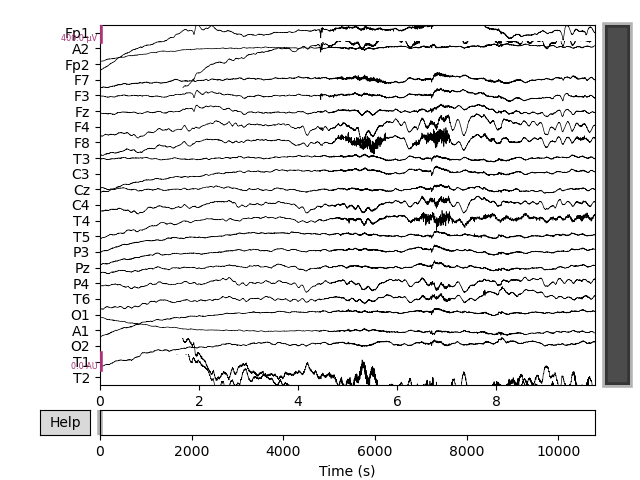

In [11]:
%matplotlib notebook
raw.plot(n_channels=23, scalings=dict(eeg=200e-6));

In [12]:
raw.notch_filter(60)

Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 6759 samples (6.601 sec)



<RawEDF | sub-24_ses-01_task-hfo_eeg.edf, 23 x 11059200 (10800.0 s), ~1.90 GB, data loaded>

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 33793 samples (33.001 sec)



<IPython.core.display.Javascript object>


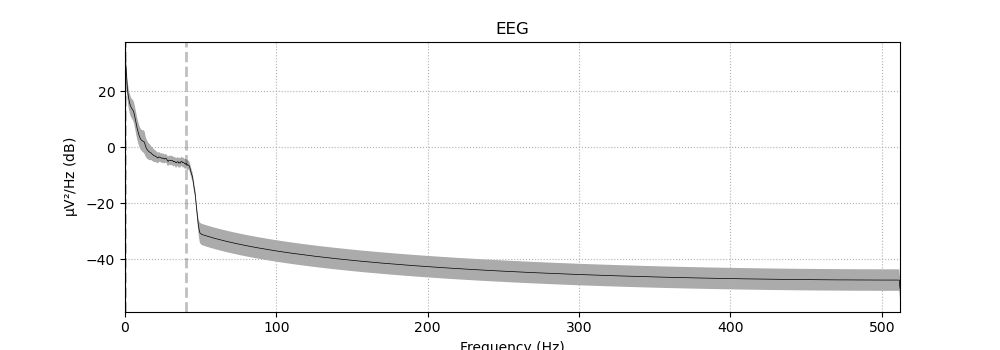

Effective window size : 2.000 (s)


<IPython.core.display.Javascript object>


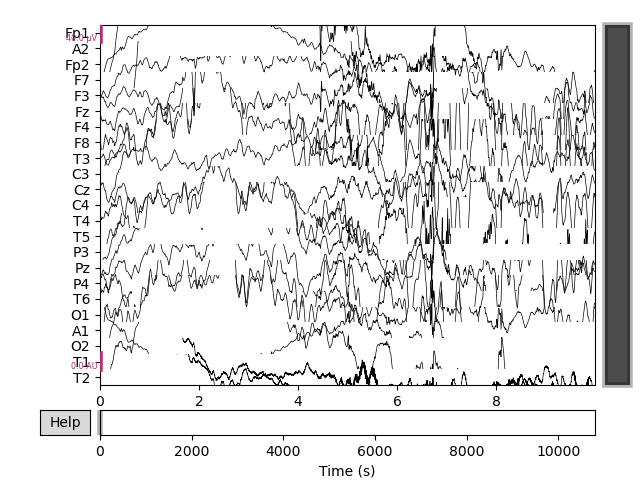

In [13]:
raw.filter(l_freq=0.1, h_freq=40.0, method='fir', phase='zero', fir_window='hamming', fir_design='firwin')
raw.plot_psd(average=True) #für Farbe "False"
raw.plot(n_channels=23);

In [14]:
raw.info['sfreq']

1024.0

<IPython.core.display.Javascript object>


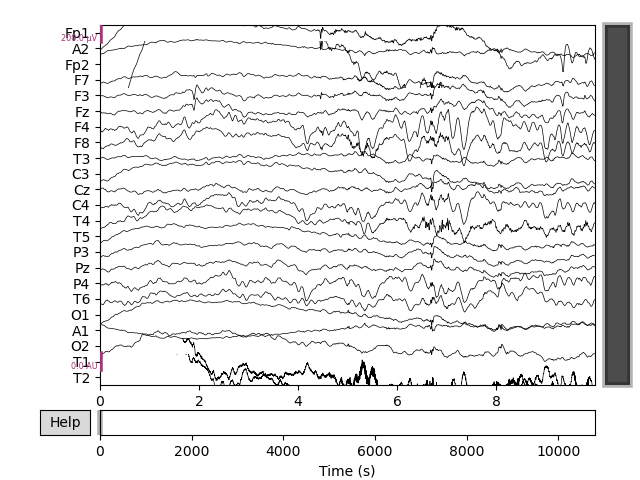

In [15]:
raw.plot(n_channels=23, scalings=dict(eeg=100e-6));

In [16]:
print(raw.info['chs'])

[{'cal': 1.0, 'logno': 1, 'scanno': 1, 'range': 1.0, 'unit_mul': 0 (FIFF_UNITM_NONE), 'ch_name': 'Fp1', 'unit': 107 (FIFF_UNIT_V), 'coord_frame': 4 (FIFFV_COORD_HEAD), 'coil_type': 1 (FIFFV_COIL_EEG), 'kind': 2 (FIFFV_EEG_CH), 'loc': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}, {'cal': 1.0, 'logno': 2, 'scanno': 2, 'range': 1.0, 'unit_mul': 0 (FIFF_UNITM_NONE), 'ch_name': 'A2', 'unit': 107 (FIFF_UNIT_V), 'coord_frame': 4 (FIFFV_COORD_HEAD), 'coil_type': 1 (FIFFV_COIL_EEG), 'kind': 2 (FIFFV_EEG_CH), 'loc': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}, {'cal': 1.0, 'logno': 3, 'scanno': 3, 'range': 1.0, 'unit_mul': 0 (FIFF_UNITM_NONE), 'ch_name': 'Fp2', 'unit': 107 (FIFF_UNIT_V), 'coord_frame': 4 (FIFFV_COORD_HEAD), 'coil_type': 1 (FIFFV_COIL_EEG), 'kind': 2 (FIFFV_EEG_CH), 'loc': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}, {'cal': 1.0, 'logno': 4, 'scanno': 4, 'range': 1.0, 'unit_mul': 0 (FIFF_UNITM_NONE), 'ch_name': 'F7', 'unit': 107 (FIFF_UNIT_V)

In [17]:
ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')
print(ten_twenty_montage)

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 94 channels>


4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


<IPython.core.display.Javascript object>


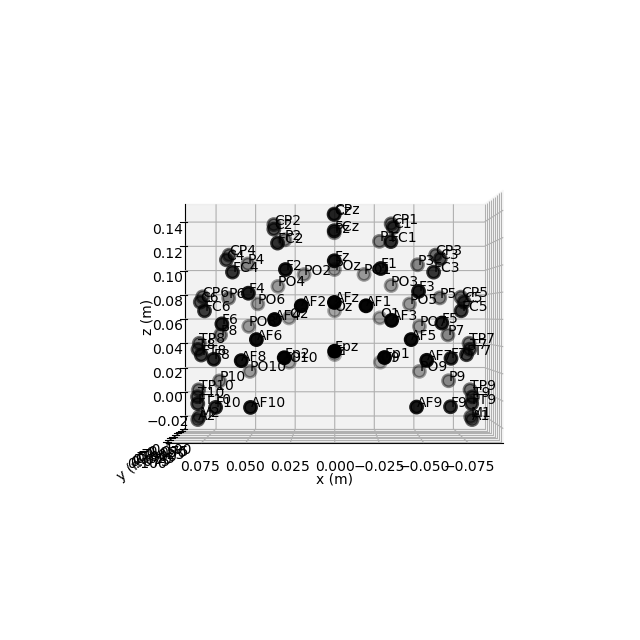

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


<IPython.core.display.Javascript object>


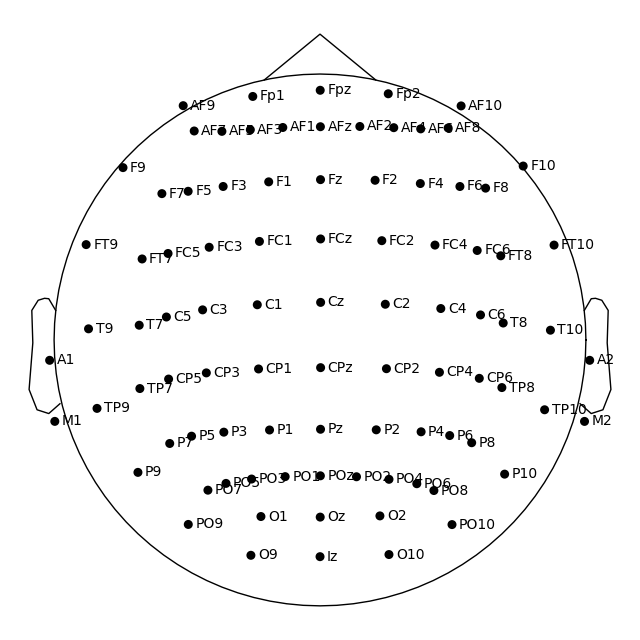

In [18]:
fig = ten_twenty_montage.plot(kind='3d')
ten_twenty_montage.plot(kind='topomap', show_names=True);

In [19]:
raw.set_montage(ten_twenty_montage)

<RawEDF | sub-24_ses-01_task-hfo_eeg.edf, 23 x 11059200 (10800.0 s), ~1.90 GB, data loaded>

In [20]:
# set up and fit the ICA   
from mne.preprocessing import ICA
num_components = 8 
ica = ICA(n_components=num_components, method='fastica')
raw_copy=raw.copy()
raw_copy=raw_copy.filter(l_freq=1.0, h_freq=None)
ica.fit(raw_copy)

<ipython-input-20-e8cc57d15613>:4: DeprecationWarning: Version 0.23 introduced max_iter="auto", setting max_iter=1000 for `fastica` and max_iter=500 for `infomax` and `picard`. The current default of max_iter=200 will be changed to "auto" in version 0.24.
  ica = ICA(n_components=num_components, method='fastica')


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3381 samples (3.302 sec)

Fitting ICA to data using 21 channels (please be patient, this may take a while)
Selecting by number: 8 components
Fitting ICA took 120.6s.


<ICA | raw data decomposition, fit (fastica): 11059200 samples, 8 components, channels used: "eeg">

<IPython.core.display.Javascript object>


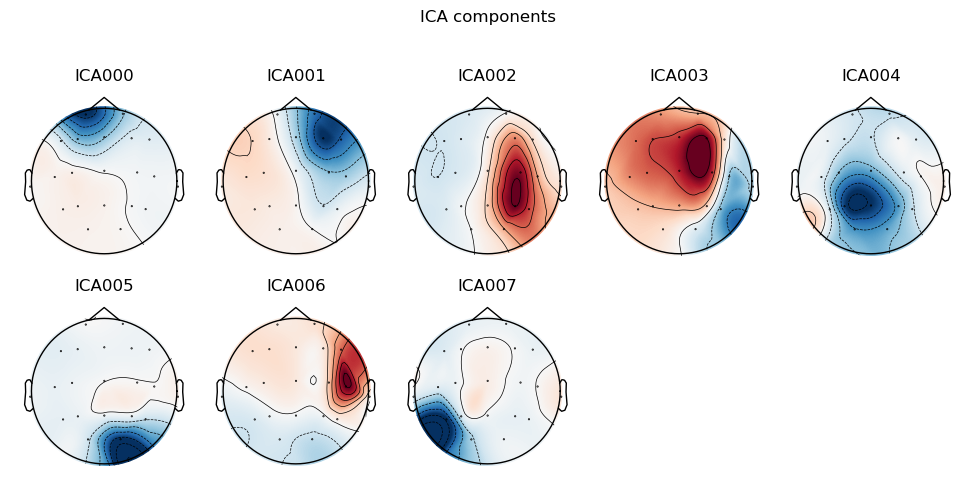

In [21]:
ica.plot_components(); 

Applying ICA to Raw instance
    Transforming to ICA space (8 components)
    Zeroing out 0 ICA components
    Projecting back using 21 PCA components


<IPython.core.display.Javascript object>


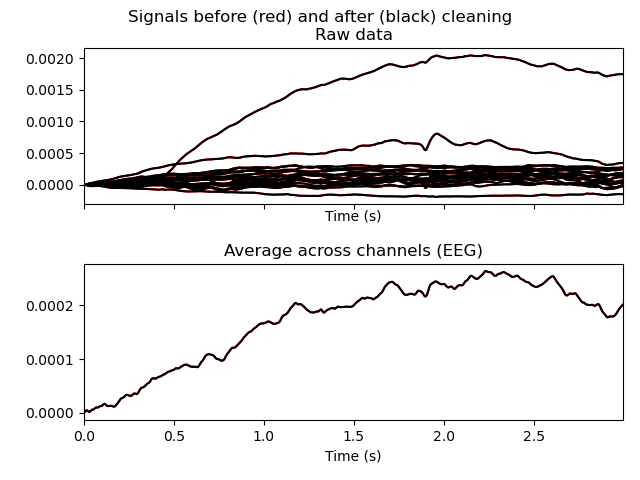

In [22]:
ica.plot_overlay(raw); 

In [23]:
ica.apply(raw)

Applying ICA to Raw instance
    Transforming to ICA space (8 components)
    Zeroing out 0 ICA components
    Projecting back using 21 PCA components


<RawEDF | sub-24_ses-01_task-hfo_eeg.edf, 23 x 11059200 (10800.0 s), ~1.90 GB, data loaded>

<IPython.core.display.Javascript object>


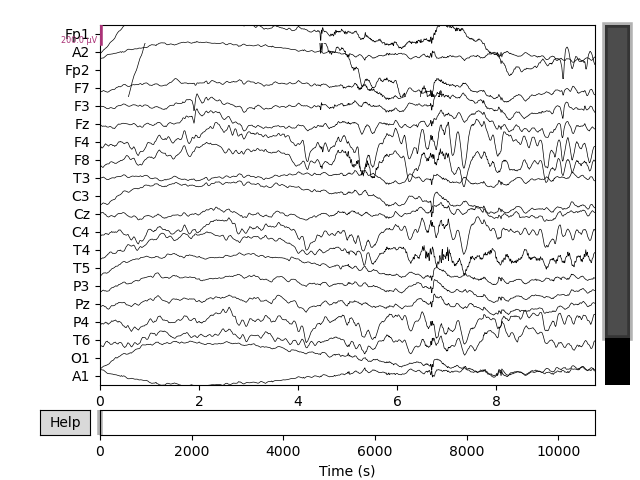

In [20]:
raw.plot(scalings=dict(eeg=100e-6));

In [21]:
from mne import Epochs
from mne import make_fixed_length_epochs

In [22]:
epochs = make_fixed_length_epochs(raw, duration = 2.0, preload = True)
epochs.resample(500.0)

Not setting metadata
Not setting metadata
5400 matching events found
No baseline correction applied
0 projection items activated
Loading data for 5400 events and 2048 original time points ...
0 bad epochs dropped


<Epochs |  5400 events (all good), 0 - 1.998 sec, baseline off, ~947.6 MB, data loaded,
 '1': 5400>

    Using multitaper spectrum estimation with 7 DPSS windows


<IPython.core.display.Javascript object>


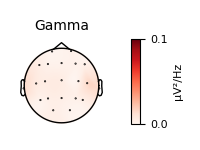

In [27]:
#epochs.plot_psd_topomap(ch_type = 'eeg', normalize = True); 
epochs.plot_psd_topomap(ch_type = 'eeg', normalize = True, bands = [(30,45,"Gamma")], vlim=(0.0, 0.1)); #lower, higher, name; min, max 